<a href="https://colab.research.google.com/github/nnilayy/Unet/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import glob 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf

## Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset

In [7]:
import matplotlib.pyplot as plt
import cv2 
import glob 
import numpy as np
X=[]
y=[]
images=sorted(glob.glob('/content/drive/MyDrive/Balls/Images/*'))
masks=sorted(glob.glob('/content/drive/MyDrive/Balls/Masks/*'))

for image in images:
  image=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  image=cv2.resize(image,(128,128))
  image=image/255
  image=np.array(image)
  X.append(image)

for mask in masks:
  mask=cv2.imread(mask,cv2.IMREAD_GRAYSCALE)
  mask=cv2.resize(mask,(128,128))
  mask=mask/255
  mask=np.array(mask)
  mask=np.where(mask>0.5,1,0).astype(mask.dtype)
  y.append(mask)

## Visualizing Images and Masks

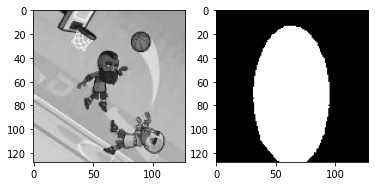

In [73]:
index=438
image=X[index]
mask=y[index]
plt.subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mask,cmap='gray')
plt.show()

In [ ]:
# mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images/255.0;
# test_images = test_images/255.0;

In [ ]:
# plt.imshow(test_images[0]*255,cmap='gray')

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, InputLayer, Reshape
model = Sequential()
model.add(InputLayer(input_shape=(128, 128, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(16384, activation="relu"))
model.add(Reshape((128, 128, 1)))
model.summary()

In [ ]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=1e-3))
model.fit(X, y, steps_per_epoch=32, epochs=200, verbose=1)

## Prediction

In [ ]:
test=X[25]
test=np.expand_dims(test,-1)
test.shape
prediction=model.predict(test.reshape(-1,128,128,1))[0]
prediction=np.where(prediction>0.2,1,0).astype(prediction.dtype)
# image=np.where(test>0.3,1,0).astype(image.dtype)
plt.imshow(image,cmap='gray')

In [ ]:
test=X[25]
test=np.expand_dims(test,-1)
prediction=model.predict(test.reshape(-1,128,128,1))[0]
prediction=np.where(prediction>0.2,1,0).astype(prediction.dtype)
plt.imshow(image,cmap='gray')
prediction=model.predict(X[25].reshape(-1,128,128,1))[0]
prediction=np.where(prediction>0.3,1,0).astype(prediction.dtype)
plt.imshow(prediction,cmap='gray')

In [60]:
import cv2 
image=cv2.imread('/content/images.jpg',cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(128,128))
image=image/255
# image=np.expand_dims(test,-1)
prediction=model.predict(image.reshape(-1,128,128,1))[0]

1/1 [==============================] - 0s 22ms/step


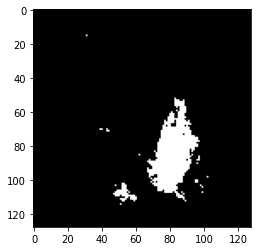

In [61]:
plt.imshow(image,cmap='gray')
# prediction=model.predict(X[25].reshape(-1,128,128,1))[0]
prediction=np.where(prediction>0.2,1,0).astype(prediction.dtype)
plt.imshow(prediction,cmap='gray')
# test.reshape(-1,128,128,1)

## Prediction on Random Image

In [ ]:
file='/content/download.png'
image=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(28,28))
plt.imshow(image,cmap='gray')

In [ ]:
prediction=model.predict(image.reshape(-1,28,28,1))[0]
prediction=np.where(prediction>0.3,1,0).astype(prediction.dtype)
plt.imshow(prediction,cmap='gray')

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=1)
print('Accuracy = %f' % test_acc)